# Exploring Dandiset 001359: 20250331_AIBS_Patchseq_human

**Warning:** This notebook was generated by AI and has not been fully verified by a human. Please use caution when interpreting the code or results.

## Overview

This notebook provides an introduction to the Dandiset [001359, version 0.250401.1603](https://dandiarchive.org/dandiset/001359/0.250401.1603):  
**20250331_AIBS_Patchseq_human**  

- Citation: Gonzalez, Limary; Allen Institute for Brain Science; National Institute of Mental Health; Kalmbach, Brian; Dalley, Rachel; Lein, Ed; Lee, Brian (2025) 20250331_AIBS_Patchseq_human (Version 0.250401.1603) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001359/0.250401.1603
- Description: HMBA Lein PatchSeq upload (human) (Q1 2025)
- Keywords: Patch-seq, human, multimodal
- Techniques: voltage clamp, current clamp, analytical

This Dandiset contains human Patch-seq multimodal data including electrophysiology and accompanying table/timeseries metadata.

## Notebook Coverage

- Listing and exploring the structure of the Dandiset and NWB files
- Preview of time series (voltage/current clamp) traces
- Displaying core tables (sweep table, epochs)
- Generating example electrophysiology plots
- Providing links and guidance for further, deeper exploration

## Required Packages

The following Python packages are required (assumed pre-installed):
- dandi
- pynwb
- h5py
- remfile
- numpy
- pandas
- matplotlib

If needed, install them using pip (do not run pip commands inside this notebook).

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive and access the Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001359", "0.250401.1603")

# Display Dandiset metadata
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")
print(f"Overall variables measured: {metadata.get('variableMeasured','')}")
print(f"Measurement techniques: {[t['name'] for t in metadata.get('measurementTechnique',[])]}")

# List some assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603
Description: HMBA Lein PatchSeq upload (human) (Q1 2025)
Overall variables measured: 
Measurement techniques: []



First 5 assets:
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb (ID: 67dc935f-cbc1-4255-bfbf-b8a3b21dacf9)
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb (ID: 6ea1c410-f443-44ef-a471-41fdf7bc8760)
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb (ID: c269347a-2d4b-4b6a-8b7c-2ef303ff503d)
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb (ID: f9663375-c4d6-4a9a-941f-c93c8a7b333a)
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb (ID: e11626f5-2176-48fc-9c4e-26da02787ba3)


## Loading a NWB File: Example

For detailed exploration, we use the NWB file:<br>
**sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb**<br>
Asset ID: `c269347a-2d4b-4b6a-8b7c-2ef303ff503d`  
URL: [NWB direct download](https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/)

[View this file on Neurosift for interactive exploration](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=0.250401.1603)

Cells below show how to load and examine this NWB file. Only subsets of data are loaded (not whole arrays), for speed and memory. You can change the NWB file path to analyze other files from the Dandiset.

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"NWB session description: {nwb.session_description if hasattr(nwb,'session_description') else ''}")
print(f"Session start: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id if hasattr(nwb,'subject') else ''}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB session description: PLACEHOLDER
Session start: 2022-09-06 17:44:39.146000+00:00
Subject ID: 1203384279


## Dataset Structure Overview

We'll now summarize the types and dimensions of available time series in the file.

In [3]:
# Summarize acquisition and stimulus time series
print("Acquisition series:")
for k, v in nwb.acquisition.items():
    series_type = type(v).__name__
    shape = v.data.shape if hasattr(v, 'data') and hasattr(v.data, 'shape') else 'N/A'
    unit = getattr(v, 'unit', 'N/A')
    print(f"  {k}: {series_type}, shape={shape}, unit={unit}")

print("\nStimulus series:")
if hasattr(nwb, "stimulus"):
    for k, v in nwb.stimulus.items():
        series_type = type(v).__name__
        shape = v.data.shape if hasattr(v, 'data') and hasattr(v.data, 'shape') else 'N/A'
        unit = getattr(v, 'unit', 'N/A')
        print(f"  {k}: {series_type}, shape={shape}, unit={unit}")

Acquisition series:
  data_00000_AD0: VoltageClampSeries, shape=(161000,), unit=amperes
  data_00001_AD0: VoltageClampSeries, shape=(161000,), unit=amperes
  data_00002_AD0: VoltageClampSeries, shape=(12297000,), unit=amperes
  data_00003_AD0: VoltageClampSeries, shape=(161000,), unit=amperes
  data_00004_AD0: CurrentClampSeries, shape=(307375,), unit=volts
  data_00005_AD0: CurrentClampSeries, shape=(182375,), unit=volts
  data_00006_AD0: CurrentClampSeries, shape=(182375,), unit=volts
  data_00007_AD0: CurrentClampSeries, shape=(182375,), unit=volts
  data_00008_AD0: CurrentClampSeries, shape=(182375,), unit=volts
  data_00009_AD0: CurrentClampSeries, shape=(182375,), unit=volts
  data_00010_AD0: CurrentClampSeries, shape=(182375,), unit=volts
  data_00011_AD0: CurrentClampSeries, shape=(182375,), unit=volts
  data_00012_AD0: CurrentClampSeries, shape=(182375,), unit=volts
  data_00013_AD0: CurrentClampSeries, shape=(182375,), unit=volts
  data_00014_AD0: CurrentClampSeries, shape=(1

## The Sweep Table

The NWB sweep table groups PatchClampSeries into sweeps (repeated measurement trials), e.g. to analyze stimulus/response pairs or align events across series.

In [4]:
import pandas as pd

if hasattr(nwb, "sweep_table"):
    sweep_df = nwb.sweep_table.to_dataframe()
    print("First 5 rows of the sweep table:")
    print(sweep_df.head())
else:
    print("No sweep_table found in NWB file.")

First 5 rows of the sweep table:
                                               series  sweep_number
id                                                                 
0   [data_00000_AD0 pynwb.icephys.VoltageClampSeri...             0
1   [data_00000_DA0 pynwb.icephys.VoltageClampStim...             0
2   [data_00001_AD0 pynwb.icephys.VoltageClampSeri...             1
3   [data_00001_DA0 pynwb.icephys.VoltageClampStim...             1
4   [data_00002_AD0 pynwb.icephys.VoltageClampSeri...             2


## Epochs Table

The epochs table provides time intervals (epochs) relevant to the experimental protocol.

In [5]:
if hasattr(nwb, "epochs") and hasattr(nwb.epochs, "to_dataframe"):
    epochs_df = nwb.epochs.to_dataframe()
    print("First 5 rows of the epochs table:")
    print(epochs_df.head())
else:
    print("No epochs found in NWB file.")

First 5 rows of the epochs table:
    start_time  stop_time                                               tags  \
id                                                                             
1       80.812     80.857  [Type=Inserted Testpulse, SubType=Baseline, Sh...   
2       80.812     80.912            [Type=Inserted Testpulse, ShortName=TP]   
3       80.857     80.867  [Type=Inserted Testpulse, SubType=Pulse, Ampli...   
4       80.867     80.912  [Type=Inserted Testpulse, SubType=Baseline, Sh...   
5       80.912     81.412   [Name=Baseline Chunk, Index=0, ShortName=U_BLC0]   

                                           timeseries  treelevel  
id                                                                
1   [(1, 9000, data_00000_DA0 pynwb.icephys.Voltag...        1.0  
2   [(1, 20000, data_00000_DA0 pynwb.icephys.Volta...        0.0  
3   [(9001, 2000, data_00000_DA0 pynwb.icephys.Vol...        1.0  
4   [(11001, 9000, data_00000_DA0 pynwb.icephys.Vo...        1.0  
5  

## Example Data Visualization: Voltage Clamp Series

We'll plot the first 10,000 points from the series `data_00000_AD0` (VoltageClampSeries). For larger analysis, consider indexing into different sweeps/epochs or time windows.

Only a subset of points are loaded for efficiency.

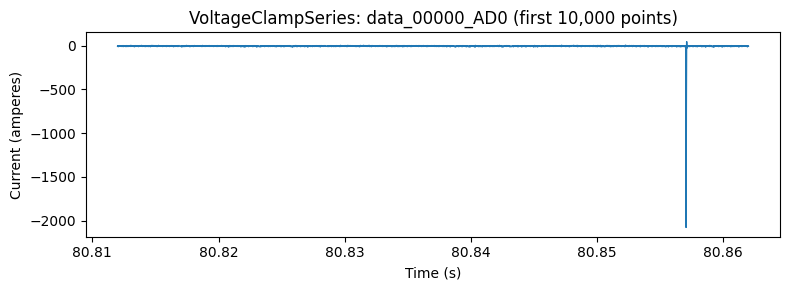

In [6]:
import numpy as np
import matplotlib.pyplot as plt

series = nwb.acquisition['data_00000_AD0']
N = 10000
data = series.data[:N]
t = np.arange(N) / series.rate + series.starting_time
plt.figure(figsize=(8, 3))
plt.plot(t, data, lw=1)
plt.xlabel('Time (s)')
plt.ylabel(f'Current ({series.unit})')
plt.title('VoltageClampSeries: data_00000_AD0 (first 10,000 points)')
plt.tight_layout()
plt.show()

*Above: The current largely remains near zero with a single abrupt event/spike. This is typical for sweeps containing transients or artifacts; please consult sweep/epoch tables for other segments and files containing richer events.*

## Example Data Visualization: Current Clamp Series

We'll show the first 10,000 points from the series `data_00004_AD0` (CurrentClampSeries). Current clamp recordings here may show subthreshold or suprathreshold electrical responses.

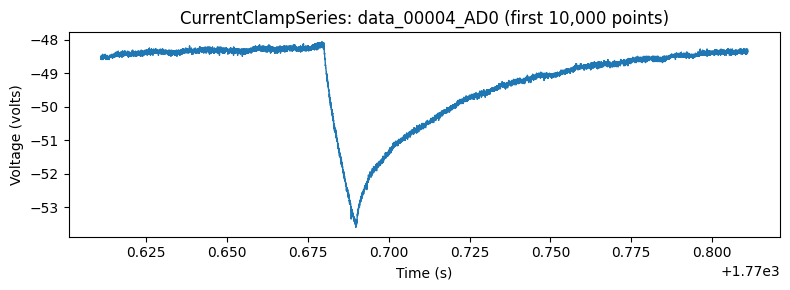

In [7]:
series = nwb.acquisition['data_00004_AD0']
N = 10000
data = series.data[:N]
t = np.arange(N) / series.rate + series.starting_time
plt.figure(figsize=(8, 3))
plt.plot(t, data, lw=1)
plt.xlabel('Time (s)')
plt.ylabel(f'Voltage ({series.unit})')
plt.title('CurrentClampSeries: data_00004_AD0 (first 10,000 points)')
plt.tight_layout()
plt.show()

*Above: The voltage trace displays clear subthreshold deflection and slow recovery, typical of a hyperpolarization or stimulus onset. Spiking events may not be visible in this particular segment.*

## Summary and Next Directions

This notebook has shown how to discover, load, and explore rich human Patch-seq electrophysiology data from Dandiset 001359. Key next steps for further analysis include:

- Visualizing responses from additional AD/DA series or sweeps
- Exploring spike/time interval tables for event annotation
- Comparing different stimulus-response segments
- Cross-referencing with associated transcriptomic or metadata fields (if present)

For more interactive visualization, [explore the selected file on neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=0.250401.1603), or adapt the code above for your particular research questions.